<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-a01794067-janmenc/blob/main/ibm_modulo_5_data_analysis_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Maestría en Inteligencia Artificial Aplicada**

## **A01794067**
## **Jose Antonio Mendoza Castro**
## *Análisis de Datos Python*

## **Ciencia y analitica de datos**

## **Dra. Maria de la Paz Rico**

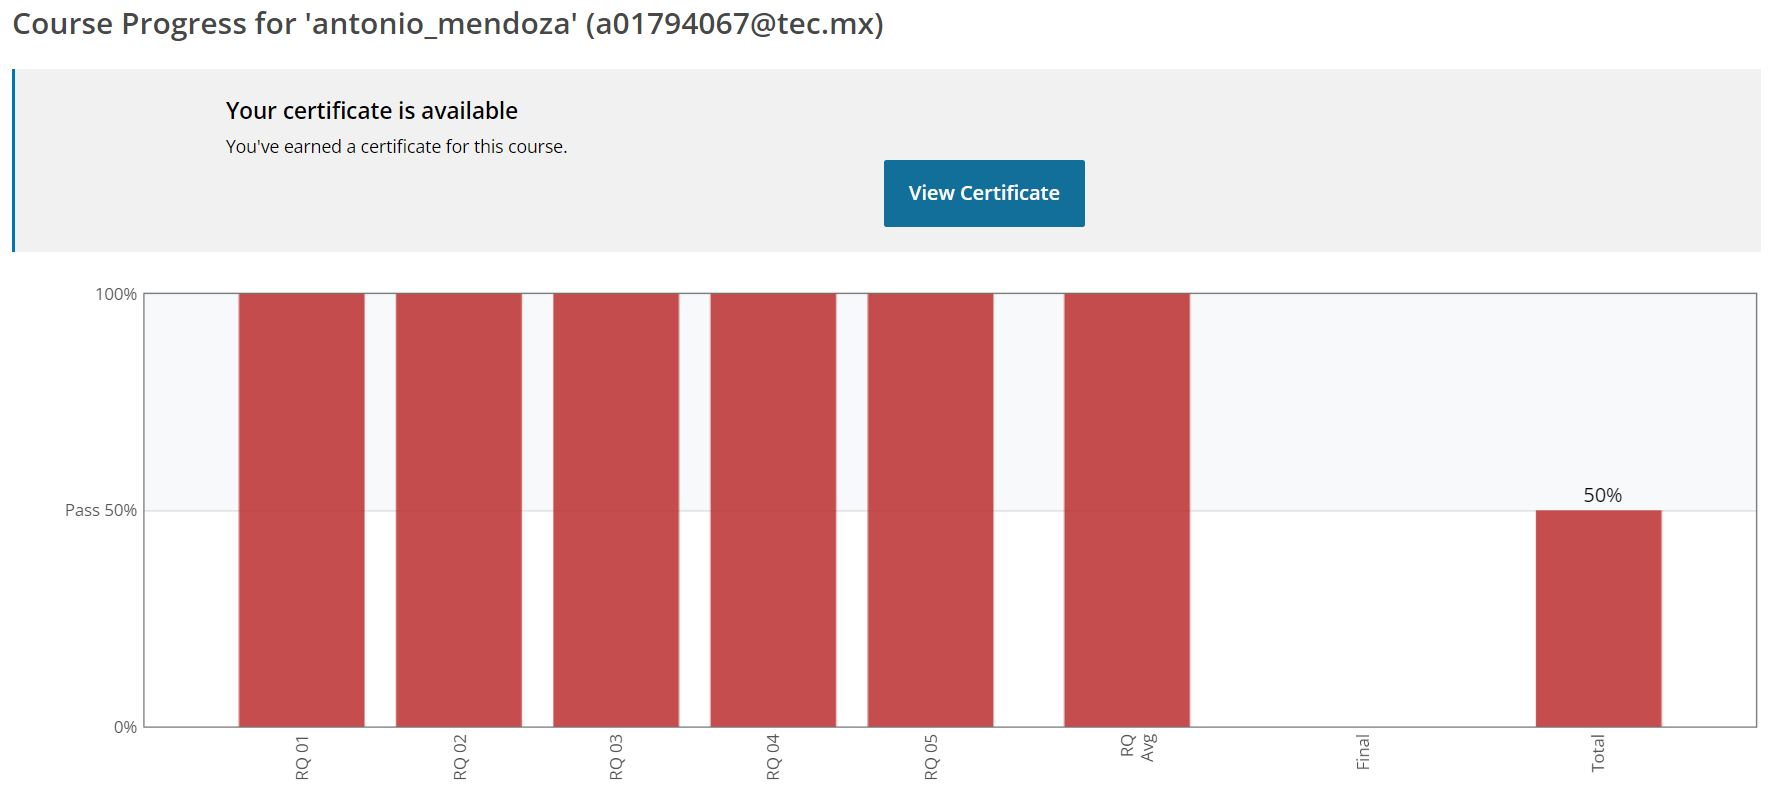

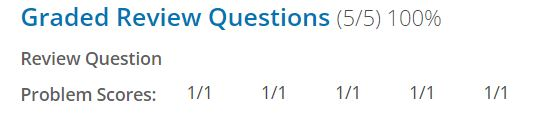

### **Evaluación del modelo**

La evaluación de un modelo es una de las partes más importantes en el desarrollo de estos, ya que con ello podemos ver si nuestro modelo será de utilidad.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [18]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [2]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'

In [3]:
df = pd.read_csv(path)

In [5]:
#Uno de los métodos más importantes es el 'train_test_split()'
y_data = df['price']
x_data=df.drop('price',axis=1)

from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 21
number of training samples: 180


In [8]:
lre=LinearRegression()

In [9]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [10]:
#uno de los primeros indicadores para evaluar nuestro modelo es a través de la R2, cuya métrica nos dice la proporción de varianza que está explicando
#la o las variables independientes sobre nuestra variable dependiente
lre.score(x_test[['horsepower']], y_test)

0.36358755750788263

In [11]:
#en este caso la R2 de nuestros datos de entretamiento es mayor que la R2 sobre nuestros datos de prueba
lre.score(x_train[['horsepower']], y_train)

0.6619724197515104

In [13]:
#otra forma que también nos permite evaluar nuestro modelo es estableciendo un grupo móvil de validación dentro de nuestros datos de entrenamiento
#lo que nos permite evitar que la parte en la que establecemos el grupo de entrenamiento y prueba pueda afectar los resultados
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.291183944475603


### **Sobre-ajuste Sub-ajuste y selección del modelo**

Cuando desarrollamos un modelo lo que buscamos es que pueda estar lo suficientemente generalizado para que pueda desempeñarse de manera adecuada al momento que lo exponemos a datos nuevos. Por lo anerior buscamos que no esté sobreajustado, es decir, que sólo funcione con un solo grupo de datos o que no esté subajustado, es decir, que contenga las variables que mejor explican el fenómeno.

In [14]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [15]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [16]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


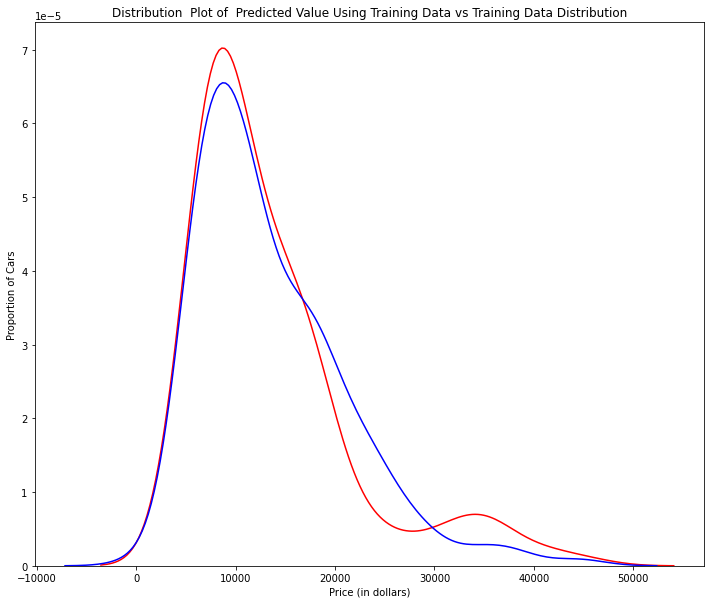

In [19]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


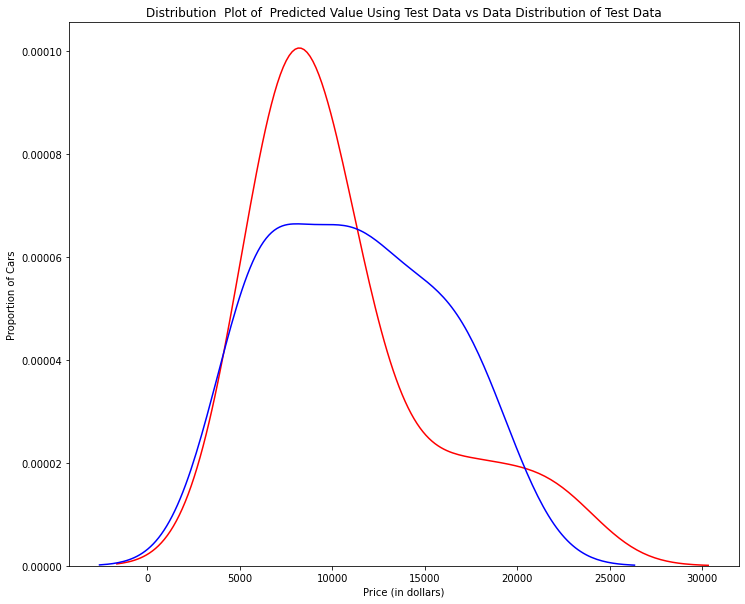

In [20]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

### **Regresión Ridge**

In [24]:
#existen algunos modelos como la regresión Ridgen que nos permiten tratar con problemas como el sobreajuste
#este modelo parte de la idea en la cual podemos penalizar los coeficientes de una regresión con lo que podemos generalizar de mejor manera un modelo
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [25]:
RigeModel=Ridge(alpha=1)

In [26]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [27]:
yhat = RigeModel.predict(x_test_pr)

In [28]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 9514.3818699   6672.42344634 10534.19951249  5506.01891856]
test set : [ 9549.  6229. 10245.  7295.]
